<Axes: xlabel='longitude', ylabel='latitude'>

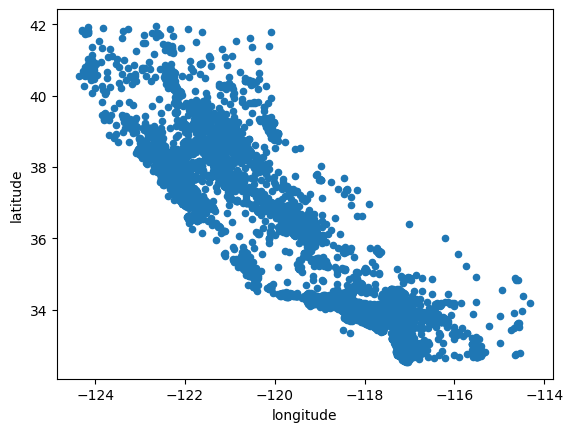

In [56]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


HOUSING_PATH = "./datasets/"

def load_housing_data(housing_data=HOUSING_PATH):
    csv_path = os.path.join(housing_data, 'housing.csv')
    return pd.read_csv(csv_path)

housing = load_housing_data()

housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

# A way to obtain a sample for a bunch of data.
# Separe in sets que data samples. 1 - train set 2 - test set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set['income_cat'].value_counts() / len(strat_test_set)

housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")

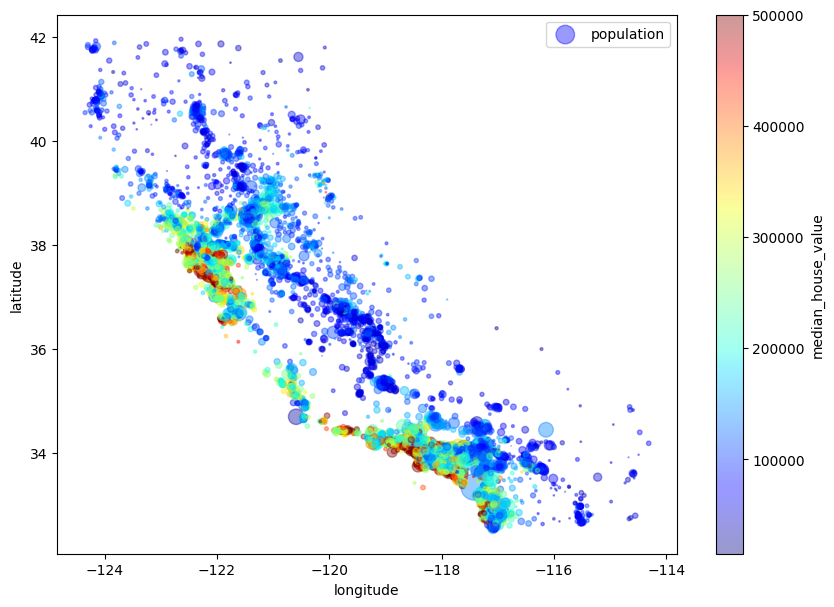

In [57]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing['population']/100, label='population', figsize=(10, 7), c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [75]:
# Pearson Correlation coefficient
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
income_cat            0.642256
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64